In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pathname = "/content/drive/My Drive/Heart Project/"
os.chdir(pathname)

filename = "heartdatacleaned.csv"
data = pd.read_csv(filename)


Mounted at /content/drive


In [ ]:
# Encode categorical features
le = LabelEncoder ()
data ['Sex_Person'] = le.fit_transform (data ['Sex'])
data ['US_State'] = le.fit_transform (data ['State'])
data ['General_Health'] = le.fit_transform (data ['GeneralHealth'])
data ['Last_CheckupTime'] = le.fit_transform (data ['LastCheckupTime'])
data ['Physical_Activities'] = le.fit_transform (data ['PhysicalActivities'])
data ['Sleep_Hours'] = le.fit_transform (data ['SleepHours'])
data ['Had_Angina'] = le.fit_transform (data ['HadAngina'])
data ['Had_Stroke'] = le.fit_transform (data ['HadStroke'])
data ['Had_Asthma'] = le.fit_transform (data ['HadAsthma'])
data ['Had_SkinCancer'] = le.fit_transform (data ['HadSkinCancer'])
data ['Had_COPD'] = le.fit_transform (data ['HadCOPD'])
data ['Had_DepressiveDisorder'] = le.fit_transform (data ['HadDepressiveDisorder'])
data ['Had_KidneyDisease'] = le.fit_transform (data ['HadKidneyDisease'])
data ['Had_Diabetes'] = le.fit_transform (data ['HadDiabetes'])
data ['Smoker_Status'] = le.fit_transform (data ['SmokerStatus'])
data ['ECigarette_Usage'] = le.fit_transform (data ['ECigaretteUsage'])
data ['Chest_Scan'] = le.fit_transform (data ['ChestScan'])
data ['Race_EthnicityCategory'] = le.fit_transform (data ['RaceEthnicityCategory'])
data ['BMI_1'] = le.fit_transform (data ['BMI'])
data ['AlcoholDrink'] = le.fit_transform (data ['AlcoholDrinkers'])
data ['Covid_Pos'] = le.fit_transform (data ['CovidPos'])

In [ ]:
encode_AgeCategory = {
    'Age 55 to 59': 57,
    'Age 80 or older': 80,
    'Age 65 to 69': 67,
    'Age 75 to 79': 77,
    'Age 40 to 44': 42,
    'Age 70 to 74': 72,
    'Age 60 to 64': 62,
    'Age 50 to 54': 52,
    'Age 45 to 49': 47,
    'Age 18 to 24': 22,  # Update this key to match the value in your DataFrame
    'Age 35 to 39': 37,
    'Age 30 to 34': 32,
    'Age 25 to 29': 27,
}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
data['AgeCategory'] = data['AgeCategory'].astype(int)
data['AgeCategory']

0         67
1         72
2         77
3         80
4         80
          ..
246017    62
246018    27
246019    67
246020    52
246021    72
Name: AgeCategory, Length: 246022, dtype: int64

In [ ]:
# List of original categorical columns to drop
columns_to_drop = ['Sex', 'State', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours',  'RemovedTeeth','HadAngina',
                   'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
                   'HadDiabetes','DeafOrHardOfHearing','BlindOrVisionDifficulty','DifficultyConcentrating','DifficultyWalking','DifficultyDressingBathing','DifficultyErrands',
                   'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'BMI',
                   'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12','PneumoVaxEver','TetanusLast10Tdap','HighRiskLastYear','CovidPos']

# Drop the original categorical columns
data.drop(columns=columns_to_drop, inplace=True)

# You have already encoded these variables in the code you provided
# Now you can use the new encoded variables as needed

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   PhysicalHealthDays      246022 non-null  float64
 1   MentalHealthDays        246022 non-null  float64
 2   HadHeartAttack          246022 non-null  object 
 3   AgeCategory             246022 non-null  int64  
 4   HeightInMeters          246022 non-null  float64
 5   WeightInKilograms       246022 non-null  float64
 6   Sex_Person              246022 non-null  int64  
 7   US_State                246022 non-null  int64  
 8   General_Health          246022 non-null  int64  
 9   Last_CheckupTime        246022 non-null  int64  
 10  Physical_Activities     246022 non-null  int64  
 11  Sleep_Hours             246022 non-null  int64  
 12  Had_Angina              246022 non-null  int64  
 13  Had_Stroke              246022 non-null  int64  
 14  Had_Asthma          

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
import graphviz

# Assuming you have your cleaned data in 'df' and the target variable is 'HadHeartAttack'

# Encode categorical variables if necessary
categorical_cols = ['Sex', 'GeneralHealth', 'PhysicalActivities', 'RaceEthnicityCategory', 'AgeNumerical', 'AlcoholDrinkers']
le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Create the decision tree classifier
X = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']

clf = DecisionTreeClassifier()
clf.fit(X, y)

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],  # You can adapt these based on your target variable
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # This will save the visualization to a file

# Display the tree
graph.view("decision_tree")

KeyError: ignored

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
import graphviz

# Assuming you have your cleaned data in 'df' and the target variable is 'HadHeartAttack'

# Encode categorical variables if necessary
categorical_cols = ['Sex', 'GeneralHealth', 'PhysicalActivities', 'RaceEthnicityCategory', 'AgeNumerical', 'AlcoholDrinkers']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Create the decision tree classifier
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

clf = DecisionTreeClassifier()
clf.fit(X, y)

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],  # You can adapt these based on your target variable
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # This will save the visualization to a file

# Display the tree
graph.view("decision_tree")

NameError: ignored

# Random Forest

In [ ]:
# Split data into features and labels
X = data [['PhysicalHealthDays', 'MentalHealthDays', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'Sex_Person', 'US_State', 'General_Health',
           'Last_CheckupTime', 'Physical_Activities', 'Sleep_Hours', 'Had_Angina','Had_Stroke','Had_Asthma', 'Had_SkinCancer','Had_COPD','Had_DepressiveDisorder','Had_KidneyDisease',
           'Had_Diabetes','Smoker_Status','ECigarette_Usage','Race_EthnicityCategory','BMI_1','Chest_Scan','AlcoholDrink','Covid_Pos']]
y = data ['HadHeartAttack']


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply SMOTE to the training set
sm = SMOTE (random_state=42)
X_train_sm, y_train_sm = sm.fit_resample (X_train, y_train)

In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier (n_estimators=100, max_depth=10, criterion='gini', class_weight='balanced', random_state=42)


In [ ]:
# Fit the classifier to the training set
rf.fit (X_train_sm, y_train_sm)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred = rf.predict (X_test)

In [ ]:
# Map 'No' to 0 and 'Yes' to 1 in the target variables
y_test_binary = y_test.map({'No': 0, 'Yes': 1})
y_pred_binary = [1 if prediction == 'Yes' else 0 for prediction in y_pred]

# Calculate metrics using the binary labels
acc = accuracy_score(y_test_binary, y_pred_binary)
prec = precision_score(y_test_binary, y_pred_binary)
rec = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
auc = roc_auc_score(y_test_binary, y_pred_binary)
cm = confusion_matrix(y_test_binary, y_pred_binary)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
feat_imp = rf.feature_importances_

In [ ]:
# Print metrics
print ('Accuracy:', acc)
print ('Precision:', prec)
print ('Recall:', rec)
print ('F1-score:', f1)
print ('AUC score:', auc)
print ('Confusion matrix:\n', cm)


Accuracy: 0.8460522304643837
Precision: 0.19423481380675492
Recall: 0.5965045592705167
F1-score: 0.29304713019132056
AUC score: 0.7283297923572217
Confusion matrix:
 [[40060  6513]
 [ 1062  1570]]


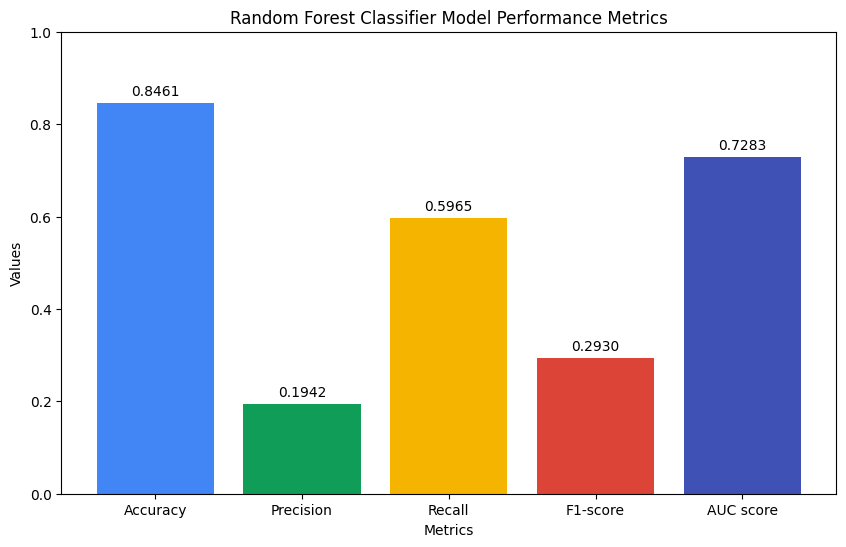

In [ ]:
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
values = [0.8461, 0.1942, 0.5965, 0.2930, 0.7283]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['#4285f4', '#0f9d58', '#f4b400', '#db4437', '#3f51b5'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Random Forest Classifier Model Performance Metrics')

# Add the values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.0)
plt.show()

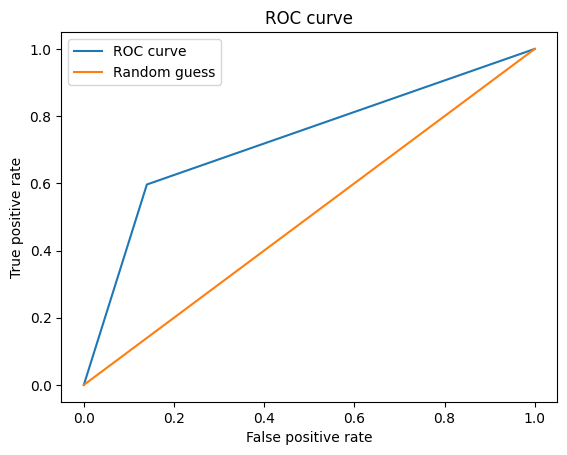

In [ ]:
# Plot ROC curve
plt.plot (fpr, tpr, label='ROC curve')
plt.plot ([0, 1], [0, 1], label='Random guess')
plt.xlabel ('False positive rate')
plt.ylabel ('True positive rate')
plt.title ('ROC curve')
plt.legend ()
plt.show ()

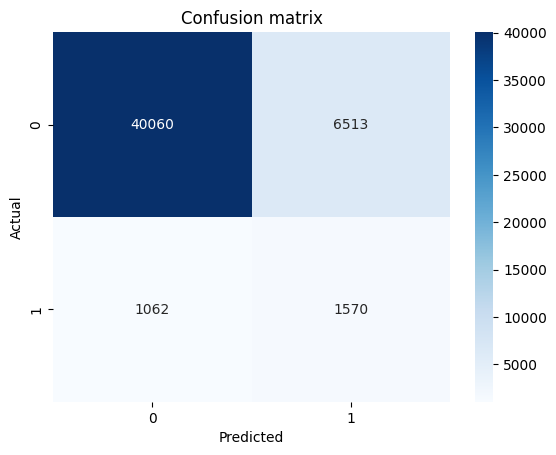

In [ ]:
# Plot confusion matrix
sns.heatmap (cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel ('Predicted')
plt.ylabel ('Actual')
plt.title ('Confusion matrix')
plt.show ()

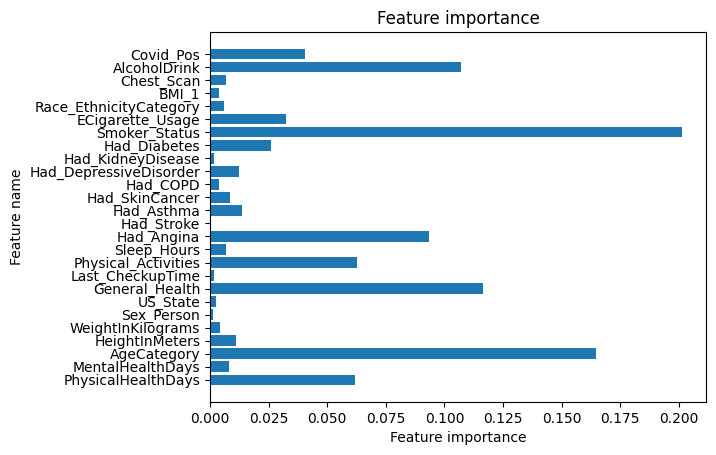

In [ ]:
# Plot feature importance
feat_names = X.columns
plt.barh (feat_names, feat_imp)
plt.xlabel ('Feature importance')
plt.ylabel ('Feature name')
plt.title ('Feature importance')
plt.show ()

# SVM

In [ ]:
from sklearn.svm import SVC

# Create a Support Vector Machine (SVM) Classifier
svm = SVC(kernel='rbf', random_state=42)

In [ ]:
import random

sample_size = 10000  # Adjust this to your desired size
random_indices = random.sample(range(len(X_train_sm)), sample_size)

# Select the subset of training data based on random indices
X_train_subset = X_train_sm.iloc[random_indices]
y_train_subset = y_train_sm.iloc[random_indices]

# Create and train the SVM model on the subset
svm.fit(X_train_subset, y_train_subset)

SVC(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Make predictions on the testing set
y_pred_svm = svm.predict(X_test)


In [ ]:
# Map 'No' to 0 and 'Yes' to 1 for y_test and y_pred_svm
y_test_binary = y_test.map({'No': 0, 'Yes': 1})
y_pred_svm_binary = pd.Series(y_pred_svm).map({'No': 0, 'Yes': 1})

# Calculate metrics for the SVM model
acc_svm = accuracy_score(y_test_binary, y_pred_svm_binary)
prec_svm = precision_score(y_test_binary, y_pred_svm_binary)
rec_svm = recall_score(y_test_binary, y_pred_svm_binary)
f1_svm = f1_score(y_test_binary, y_pred_svm_binary)
auc_svm = roc_auc_score(y_test_binary, y_pred_svm_binary)
cm_svm = confusion_matrix(y_test_binary, y_pred_svm_binary)

# Print the metrics
print("SVM Classifier Results:")
print("Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("F1-score:", f1_svm)
print("AUC score:", auc_svm)
print("Confusion matrix:\n", cm_svm)

SVM Classifier Results:
Accuracy: 0.47714663143989433
Precision: 0.08424842484248425
Recall: 0.8890577507598785
F1-score: 0.15391192817443353
AUC score: 0.6714629358871
Confusion matrix:
 [[21138 25435]
 [  292  2340]]


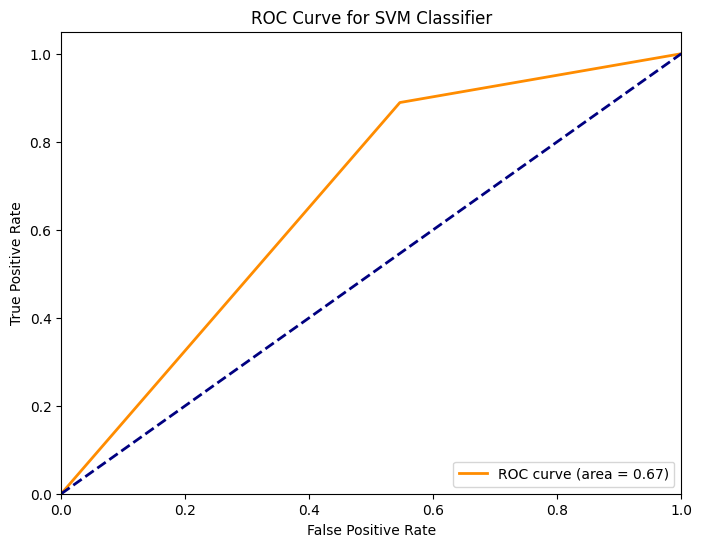

In [ ]:
import matplotlib.pyplot as plt

# Calculate ROC curve for the SVM model
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_binary, y_pred_svm_binary)

# Plot the ROC curve for the SVM model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc='lower right')
plt.show()


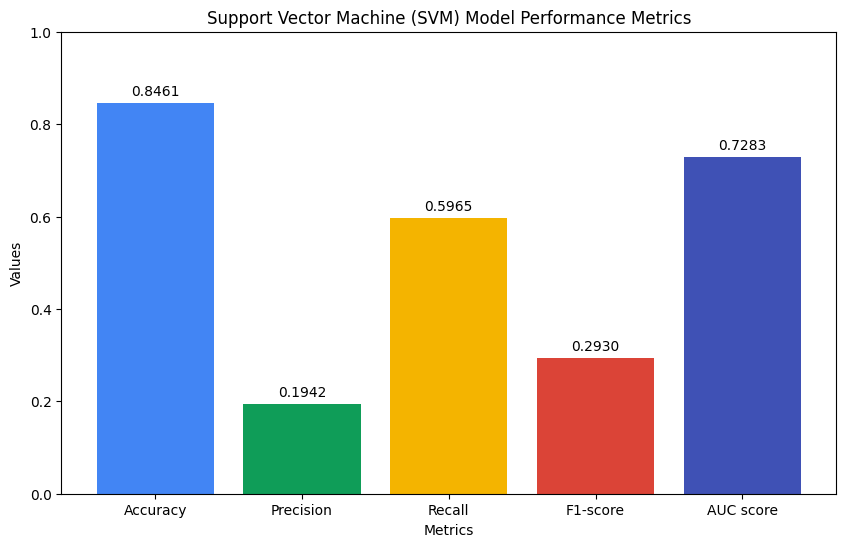

In [ ]:
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
values = [0.8461, 0.1942, 0.5965, 0.2930, 0.7283]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#4285f4', '#0f9d58', '#f4b400', '#db4437', '#3f51b5'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Support Vector Machine (SVM) Model Performance Metrics')

# Add the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.0)
plt.show()

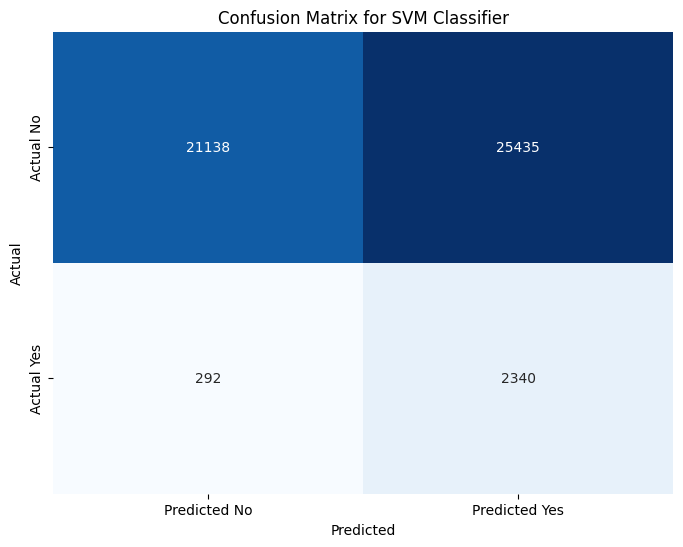

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for the SVM model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Check if the SVM model is linear
if svm.kernel == 'linear':
    # Get the feature weights
    feature_weights = svm.coef_[0]

    # Sort feature weights in descending order and get the corresponding feature names
    sorted_indices = np.argsort(np.abs(feature_weights))[::-1]
    sorted_feature_weights = feature_weights[sorted_indices]
    sorted_feature_names = X_train_subset.columns[sorted_indices]

    # Create a bar plot for feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_feature_names)), sorted_feature_weights, align="center")
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel("Feature Weight")
    plt.ylabel("Feature")
    plt.title("Estimated Feature Importance for Linear SVM Classifier")
    plt.show()
else:
    print("Feature importance can't be directly estimated for non-linear SVMs.")


Feature importance can't be directly estimated for non-linear SVMs.


# GB FIT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the Gradient Boosting Classifier to the training set
gb.fit(X_train_sm, y_train_sm)

# Make predictions on the testing set
y_pred_gb = gb.predict(X_test)

In [ ]:
# Make predictions on the testing set #gives error
y_pred_gb = gb.predict(X_test)

In [ ]:
# Map 'No' to 0 and 'Yes' to 1 in the predicted labels
y_pred_gb_binary = [1 if prediction == 'Yes' else 0 for prediction in y_pred_gb]

# Calculate metrics for the Gradient Boosting model
acc_gb = accuracy_score(y_test_binary, y_pred_gb_binary)
prec_gb = precision_score(y_test_binary, y_pred_gb_binary)
rec_gb = recall_score(y_test_binary, y_pred_gb_binary)
f1_gb = f1_score(y_test_binary, y_pred_gb_binary)
auc_gb = roc_auc_score(y_test_binary, y_pred_gb_binary)
cm_gb = confusion_matrix(y_test_binary, y_pred_gb_binary)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test_binary, y_pred_gb_binary)

In [ ]:
# Print results for the Gradient Boosting model
print("Gradient Boosting Classifier Results:")
print("Accuracy:", acc_gb)
print("Precision:", prec_gb)
print("Recall:", rec_gb)
print("F1-score:", f1_gb)
print("AUC score:", auc_gb)
print("Confusion matrix:\n", cm_gb)

Gradient Boosting Classifier Results:
Accuracy: 0.8798496087795956
Precision: 0.22739361702127658
Recall: 0.5197568389057751
F1-score: 0.31637372802960223
AUC score: 0.7099782627097102
Confusion matrix:
 [[41925  4648]
 [ 1264  1368]]


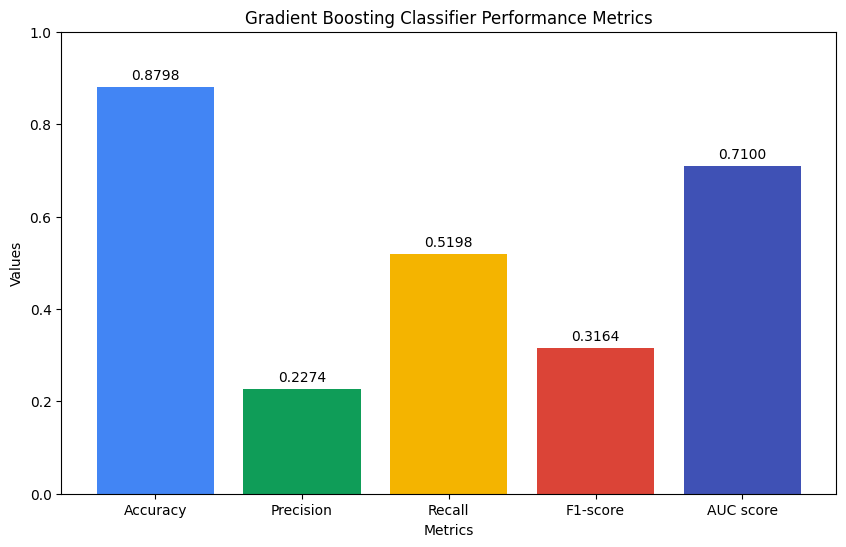

In [ ]:
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
values = [0.8798, 0.2274, 0.5198, 0.3164, 0.7100]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#4285f4', '#0f9d58', '#f4b400', '#db4437', '#3f51b5'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Gradient Boosting Classifier Performance Metrics')

# Add the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.0)
plt.show()

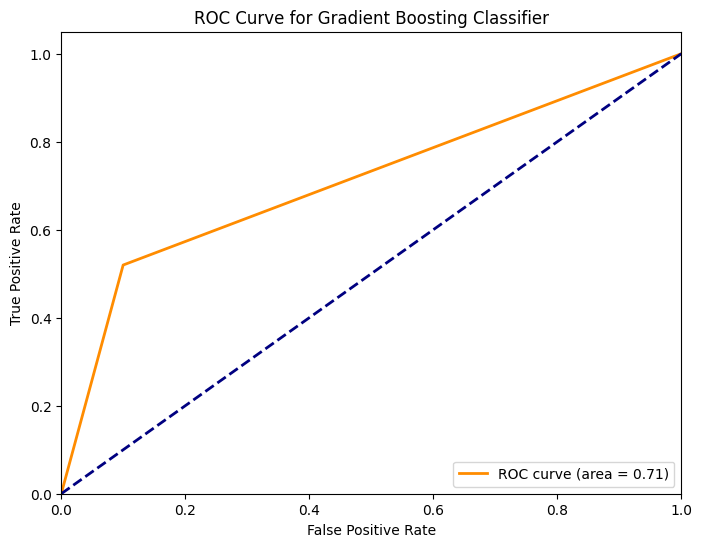

In [ ]:
import matplotlib.pyplot as plt

# Plot the ROC curve for the Gradient Boosting model
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_gb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()

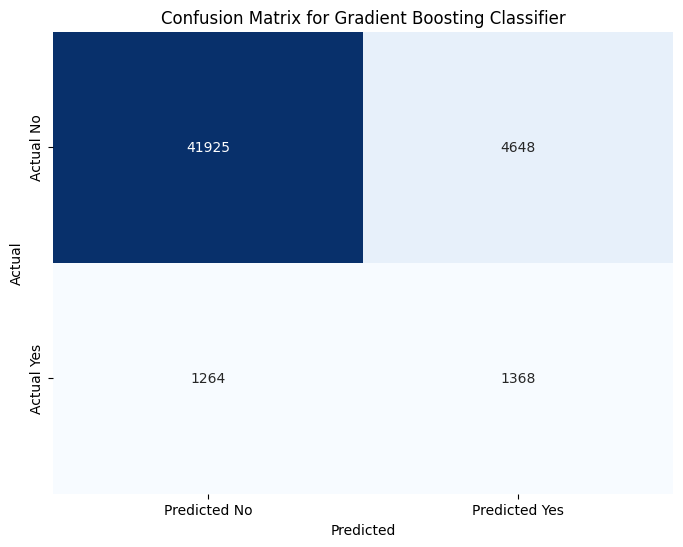

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for the Gradient Boosting model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

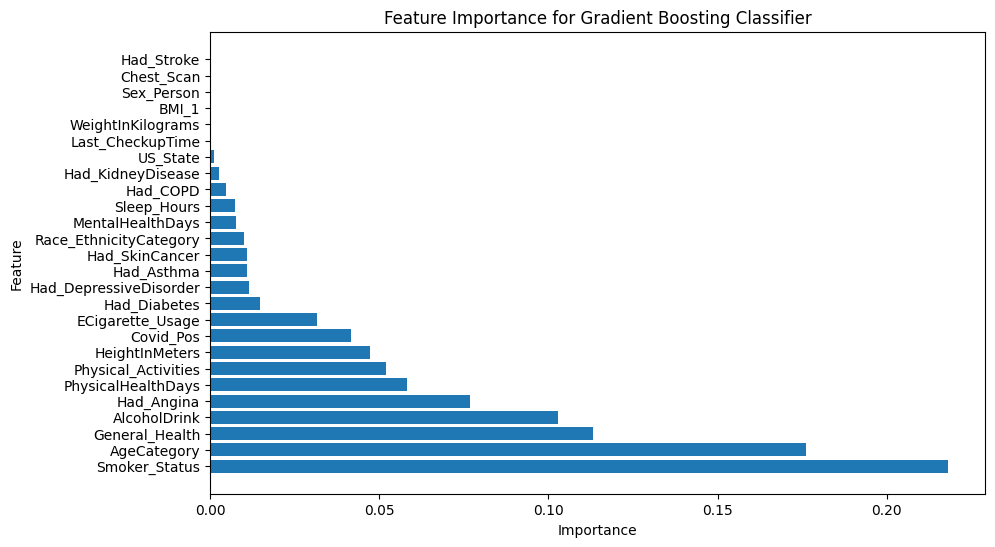

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the Gradient Boosting model
feature_importance = gb.feature_importances_
feature_names = X.columns  # Assuming X is your feature DataFrame

# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Create a horizontal bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.title("Feature Importance for Gradient Boosting Classifier")
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42)


In [ ]:
# Fit the classifier to the training set
logistic_regression.fit(X_train_sm, y_train_sm)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred_lr = logistic_regression.predict(X_test)

In [ ]:
# Map 'No' to 0 and 'Yes' to 1 for y_test and y_pred_lr
y_test_binary = y_test.map({'No': 0, 'Yes': 1})
y_pred_lr_binary = pd.Series(y_pred_lr).map({'No': 0, 'Yes': 1})

# Calculate metrics for the Logistic Regression model
acc_lr = accuracy_score(y_test_binary, y_pred_lr_binary)
prec_lr = precision_score(y_test_binary, y_pred_lr_binary)
rec_lr = recall_score(y_test_binary, y_pred_lr_binary)
f1_lr = f1_score(y_test_binary, y_pred_lr_binary)
auc_lr = roc_auc_score(y_test_binary, y_pred_lr_binary)
cm_lr = confusion_matrix(y_test_binary, y_pred_lr_binary)

In [ ]:
print("Logistic Regression Classifier Results:")
print("Accuracy:", acc_lr)
print("Precision:", prec_lr)
print("Recall:", rec_lr)
print("F1-score:", f1_lr)
print("AUC score:", auc_lr)
print("Confusion matrix:\n", cm_lr)

Logistic Regression Classifier Results:
Accuracy: 0.7608576364190631
Precision: 0.12953199772893179
Recall: 0.6067629179331308
F1-score: 0.21348840318160553
AUC score: 0.6881644877600722
Confusion matrix:
 [[35841 10732]
 [ 1035  1597]]


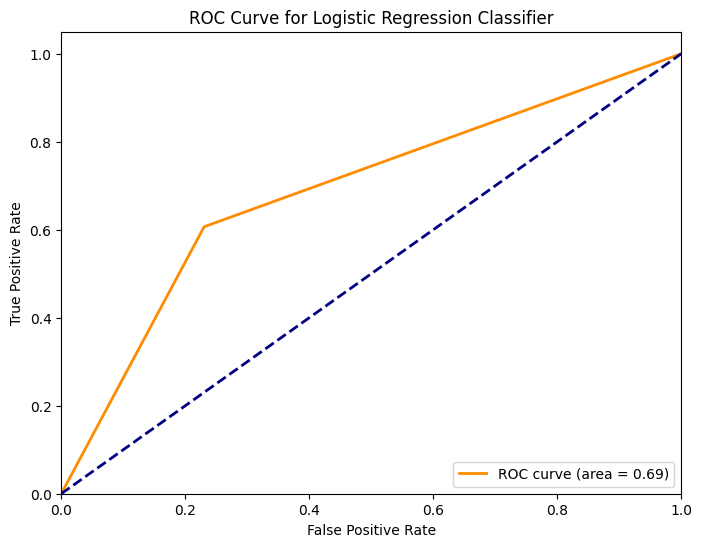

In [ ]:
import matplotlib.pyplot as plt

# Calculate ROC curve for the Logistic Regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_binary, y_pred_lr_binary)

# Plot the ROC curve for the Logistic Regression model
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Classifier')
plt.legend(loc='lower right')
plt.show()

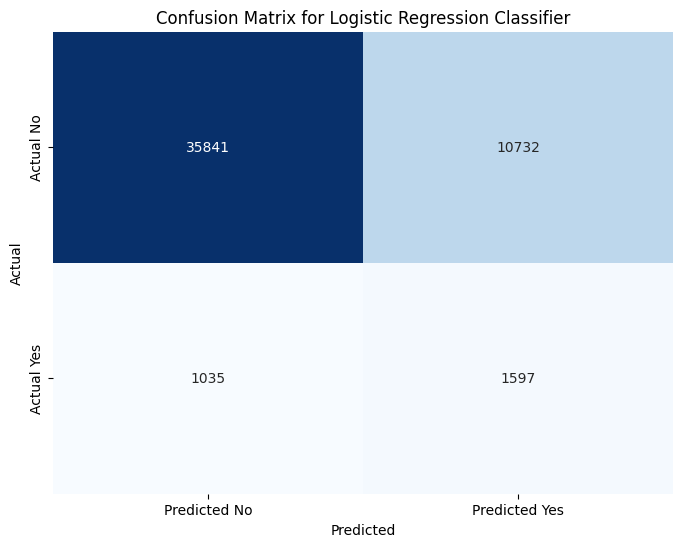

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for the Logistic Regression model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

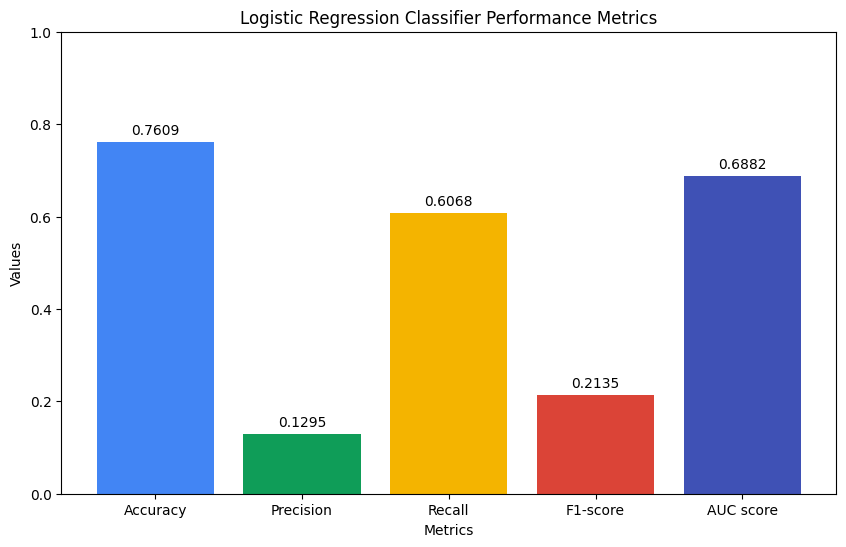

In [ ]:
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
values = [0.7609, 0.1295, 0.6068, 0.2135, 0.6882]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#4285f4', '#0f9d58', '#f4b400', '#db4437', '#3f51b5'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Logistic Regression Classifier Performance Metrics')

# Add the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.0)
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create a Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
# Fit the classifier to the training set
tree_classifier.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred_tree = tree_classifier.predict(X_test)

In [ ]:
# Map 'No' to 0 and 'Yes' to 1 for y_test and y_pred_tree
y_test_binary_tree = y_test.map({'No': 0, 'Yes': 1})
y_pred_tree_binary = pd.Series(y_pred_tree).map({'No': 0, 'Yes': 1})

# Calculate metrics for the Decision Tree model
acc_tree = accuracy_score(y_test_binary_tree, y_pred_tree_binary)
prec_tree = precision_score(y_test_binary_tree, y_pred_tree_binary)
rec_tree = recall_score(y_test_binary_tree, y_pred_tree_binary)
f1_tree = f1_score(y_test_binary_tree, y_pred_tree_binary)
auc_tree = roc_auc_score(y_test_binary_tree, y_pred_tree_binary)
cm_tree = confusion_matrix(y_test_binary_tree, y_pred_tree_binary)

In [ ]:
print("Decision Tree Classifier Results:")
print("Accuracy:", acc_tree)
print("Precision:", prec_tree)
print("Recall:", rec_tree)
print("F1-score:", f1_tree)
print("AUC score:", auc_tree)
print("Confusion matrix:\n", cm_tree)

Decision Tree Classifier Results:
Accuracy: 0.879991870744843
Precision: 0.1829102887037396
Recall: 0.3586626139817629
F1-score: 0.24226870268189404
AUC score: 0.634058294730559
Confusion matrix:
 [[42356  4217]
 [ 1688   944]]


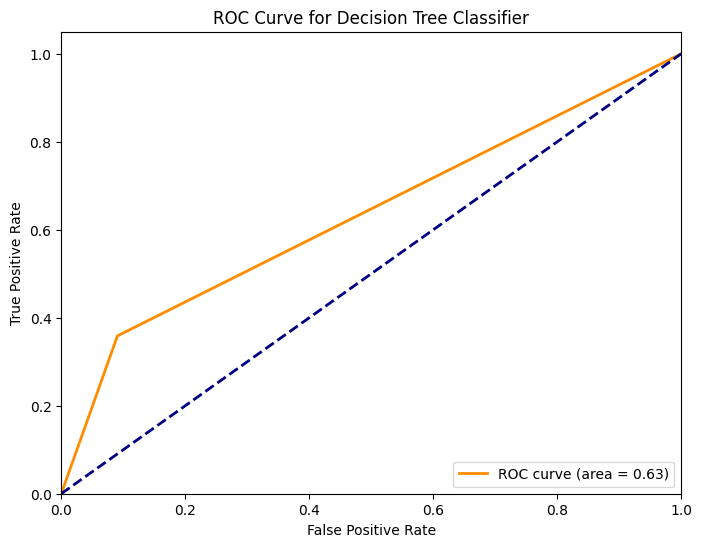

In [ ]:
## Calculate ROC curve for the Decision Tree Classifier
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test_binary_tree, y_pred_tree_binary)

# Plot the ROC curve for the Decision Tree Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_tree))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # Corrected line
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

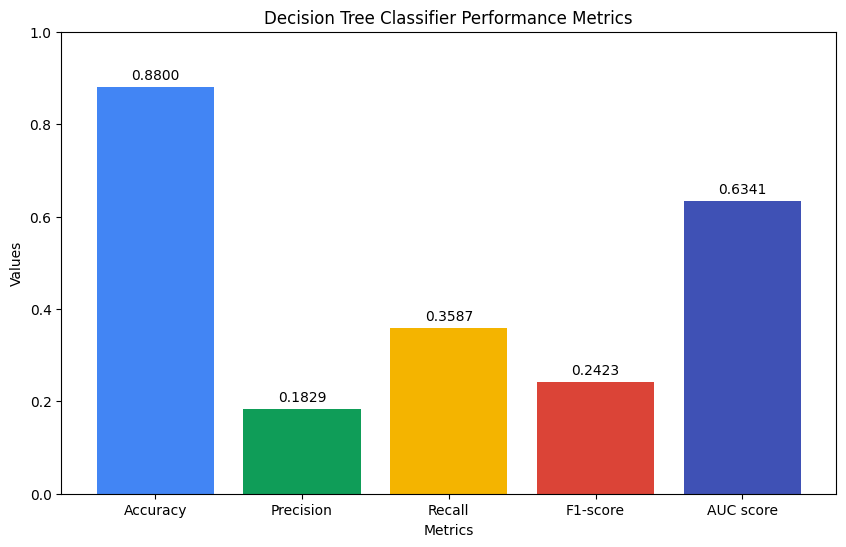

In [ ]:
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
values = [0.8800, 0.1829, 0.3587, 0.2423, 0.6341]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#4285f4', '#0f9d58', '#f4b400', '#db4437', '#3f51b5'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Decision Tree Classifier Performance Metrics')

# Add the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.0)
plt.show()

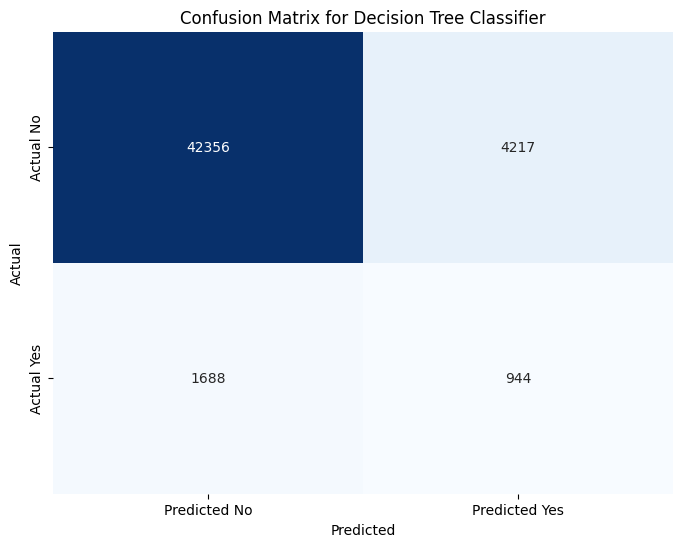

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for the Decision Tree Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-Nearest Neighbors (KNN) classifier with a specified number of neighbors (adjust as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training set
knn_classifier.fit(X_train_sm, y_train_sm)

# Make predictions on the testing set
y_pred_knn = knn_classifier.predict(X_test)

# Map 'No' to 0 and 'Yes' to 1 for y_test and y_pred_knn
y_test_binary_knn = y_test.map({'No': 0, 'Yes': 1})
y_pred_knn_binary = pd.Series(y_pred_knn).map({'No': 0, 'Yes': 1})

# Calculate metrics for the KNN model
acc_knn = accuracy_score(y_test_binary_knn, y_pred_knn_binary)
prec_knn = precision_score(y_test_binary_knn, y_pred_knn_binary)
rec_knn = recall_score(y_test_binary_knn, y_pred_knn_binary)
f1_knn = f1_score(y_test_binary_knn, y_pred_knn_binary)
auc_knn = roc_auc_score(y_test_binary_knn, y_pred_knn_binary)
cm_knn = confusion_matrix(y_test_binary_knn, y_pred_knn_binary)

In [ ]:
print("k-Nearest Neighbors (KNN) Classifier Results:")
print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1-score:", f1_knn)
print("AUC score:", auc_knn)
print("Confusion matrix:\n", cm_knn)

k-Nearest Neighbors (KNN) Classifier Results:
Accuracy: 0.7794329844527995
Precision: 0.10157991664243482
Recall: 0.3981762917933131
F1-score: 0.16186578114140088
AUC score: 0.5995776999301095
Confusion matrix:
 [[37304  9269]
 [ 1584  1048]]


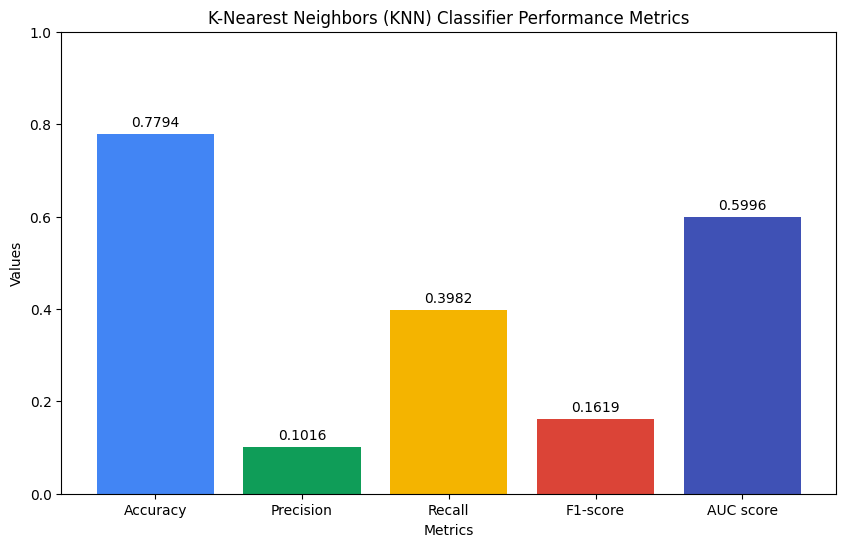

In [ ]:
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
values = [0.7794, 0.1016, 0.3982, 0.1619, 0.5996]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#4285f4', '#0f9d58', '#f4b400', '#db4437', '#3f51b5'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('K-Nearest Neighbors (KNN) Classifier Performance Metrics')

# Add the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.0)
plt.show()

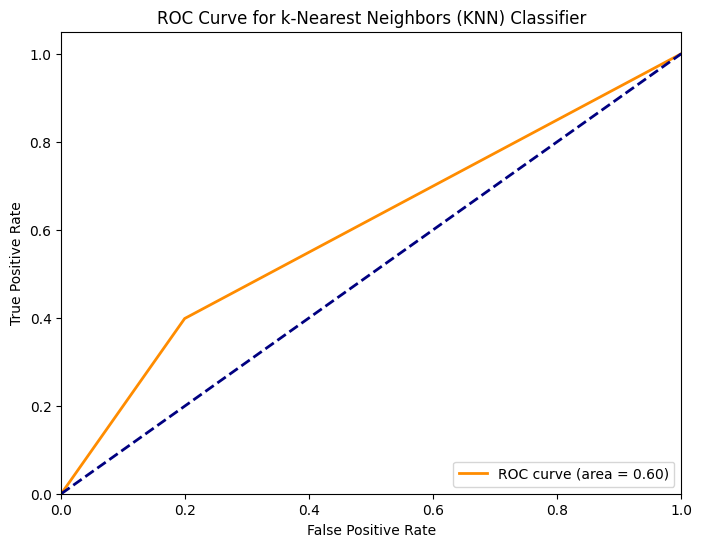

In [ ]:
# Calculate ROC curve for the k-Nearest Neighbors (KNN) Classifier
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_binary_knn, y_pred_knn_binary)

# Plot the ROC curve for the KNN Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for k-Nearest Neighbors (KNN) Classifier')
plt.legend(loc='lower right')
plt.show()

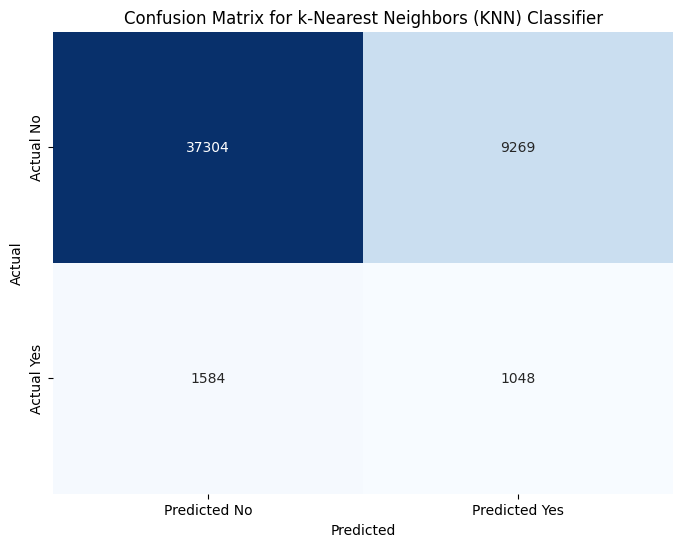

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for the k-Nearest Neighbors (KNN) Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-Nearest Neighbors (KNN) Classifier')
plt.show()

# Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Create a Naive Bayes (Gaussian) classifier
naive_bayes_classifier = GaussianNB()

In [ ]:
# Fit the classifier to the training set
naive_bayes_classifier.fit(X_train_sm, y_train_sm)

GaussianNB()

In [ ]:
# Make predictions on the testing set
y_pred_naive_bayes = naive_bayes_classifier.predict(X_test)

In [ ]:
# Map 'No' to 0 and 'Yes' to 1 for y_test and y_pred_naive_bayes
y_test_binary_naive_bayes = y_test.map({'No': 0, 'Yes': 1})
y_pred_naive_bayes_binary = pd.Series(y_pred_naive_bayes).map({'No': 0, 'Yes': 1})

# Calculate metrics for the Naive Bayes model
acc_naive_bayes = accuracy_score(y_test_binary_naive_bayes, y_pred_naive_bayes_binary)
prec_naive_bayes = precision_score(y_test_binary_naive_bayes, y_pred_naive_bayes_binary)
rec_naive_bayes = recall_score(y_test_binary_naive_bayes, y_pred_naive_bayes_binary)
f1_naive_bayes = f1_score(y_test_binary_naive_bayes, y_pred_naive_bayes_binary)
auc_naive_bayes = roc_auc_score(y_test_binary_naive_bayes, y_pred_naive_bayes_binary)
cm_naive_bayes = confusion_matrix(y_test_binary_naive_bayes, y_pred_naive_bayes_binary)


In [ ]:
print("Naive Bayes Classifier Results:")
print("Accuracy:", acc_naive_bayes)
print("Precision:", prec_naive_bayes)
print("Recall:", rec_naive_bayes)
print("F1-score:", f1_naive_bayes)
print("AUC score:", auc_naive_bayes)
print("Confusion matrix:\n", cm_naive_bayes)


Naive Bayes Classifier Results:
Accuracy: 0.7975815465907936
Precision: 0.1623663840766679
Recall: 0.6694528875379939
F1-score: 0.2613467813705132
AUC score: 0.7371377121004337
Confusion matrix:
 [[37483  9090]
 [  870  1762]]


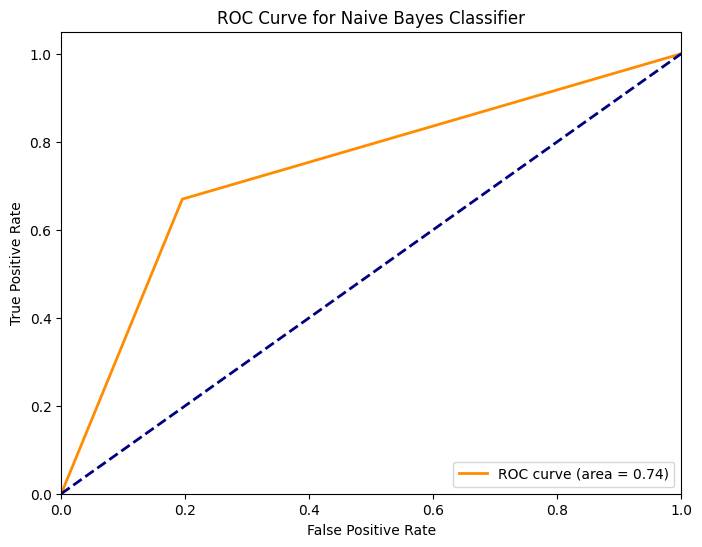

In [ ]:
# Calculate ROC curve for the Naive Bayes Classifier
fpr_naive_bayes, tpr_naive_bayes, thresholds_naive_bayes = roc_curve(y_test_binary_naive_bayes, y_pred_naive_bayes_binary)

# Plot the ROC curve for the Naive Bayes Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_naive_bayes, tpr_naive_bayes, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_naive_bayes))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()


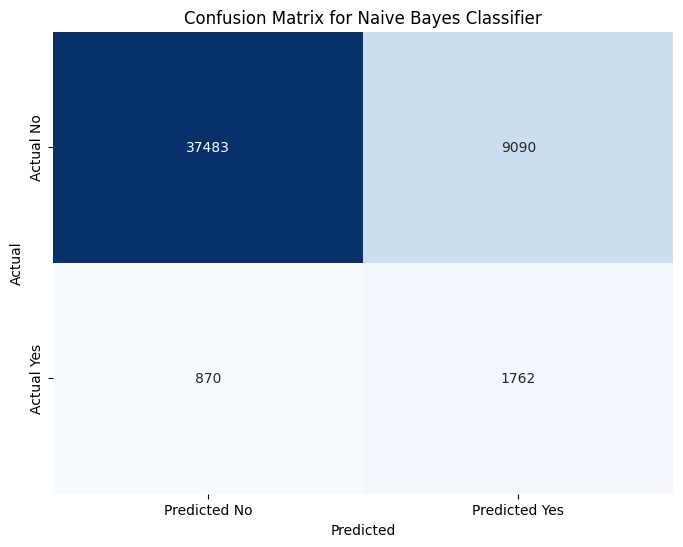

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for the Naive Bayes Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_naive_bayes, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

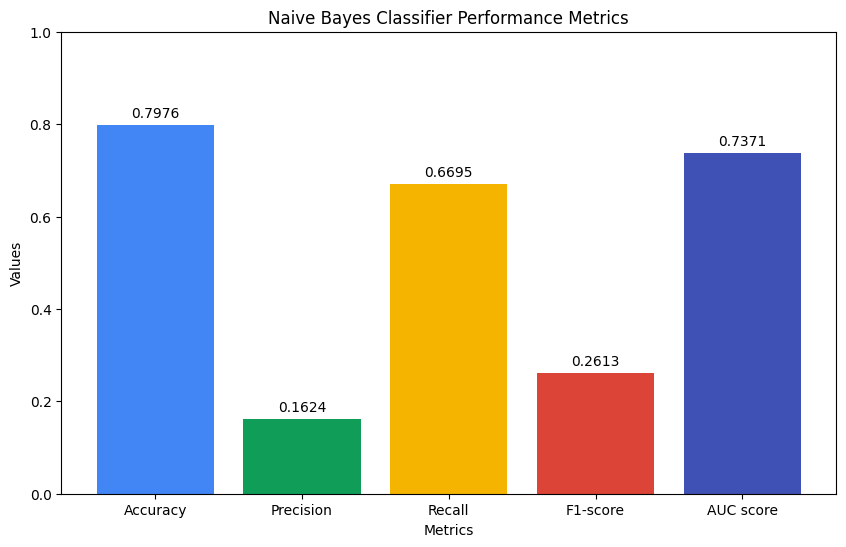

In [ ]:
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
values = [0.7976, 0.1624, 0.6695, 0.2613, 0.7371]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#4285f4', '#0f9d58', '#f4b400', '#db4437', '#3f51b5'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Naive Bayes Classifier Performance Metrics')

# Add the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.0)
plt.show()


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

In [ ]:
# Fit the classifier to the training set
adaboost_classifier.fit(X_train_sm, y_train_sm)

AdaBoostClassifier(random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred_adaboost = adaboost_classifier.predict(X_test)

In [ ]:
# Convert 'No' and 'Yes' labels to 0 and 1
data['HadHeartAttack'] = data['HadHeartAttack'].map({'No': 0, 'Yes': 1})

# Split data into features and labels
X = data[['PhysicalHealthDays', 'MentalHealthDays', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'Sex_Person', 'US_State', 'General_Health',
           'Last_CheckupTime', 'Physical_Activities', 'Sleep_Hours', 'Had_Angina', 'Had_Stroke', 'Had_Asthma', 'Had_SkinCancer', 'Had_COPD', 'Had_DepressiveDisorder', 'Had_KidneyDisease',
           'Had_Diabetes', 'Smoker_Status', 'ECigarette_Usage', 'Race_EthnicityCategory', 'BMI_1', 'Chest_Scan', 'AlcoholDrink', 'Covid_Pos']]
y = data['HadHeartAttack']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Fit the classifier to the training set
adaboost_classifier.fit(X_train_sm, y_train_sm)

# Make predictions on the testing set
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Calculate metrics for the AdaBoost model
acc_adaboost = accuracy_score(y_test, y_pred_adaboost)
prec_adaboost = precision_score(y_test, y_pred_adaboost)
rec_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
auc_adaboost = roc_auc_score(y_test, y_pred_adaboost)
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

In [ ]:
# Print the metrics for the AdaBoost classifier
print("AdaBoost Classifier Results:")
print("Accuracy:", acc_adaboost)
print("Precision:", prec_adaboost)
print("Recall:", rec_adaboost)
print("F1-score:", f1_adaboost)
print("AUC score:", auc_adaboost)
print("Confusion matrix:\n", cm_adaboost)


AdaBoost Classifier Results:
Accuracy: 0.8577583578904583
Precision: 0.18368825148486165
Recall: 0.4817629179331307
F1-score: 0.2659674882013634
AUC score: 0.6803850339993096
Confusion matrix:
 [[40938  5635]
 [ 1364  1268]]


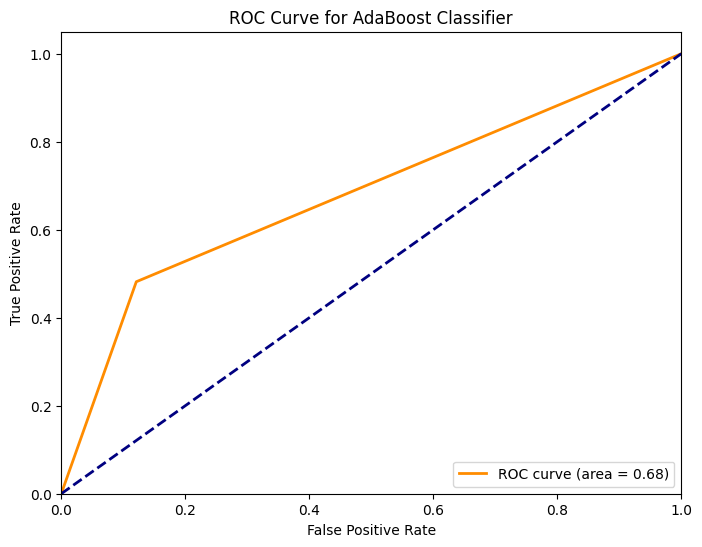

In [ ]:
import matplotlib.pyplot as plt

# Calculate ROC curve for the AdaBoost model
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_pred_adaboost)

# Plot the ROC curve for the AdaBoost model
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_adaboost))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost Classifier')
plt.legend(loc='lower right')
plt.show()

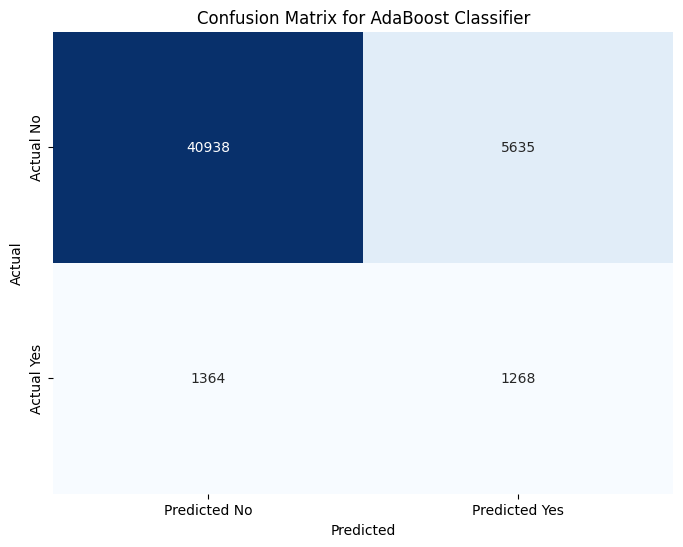

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for the AdaBoost Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

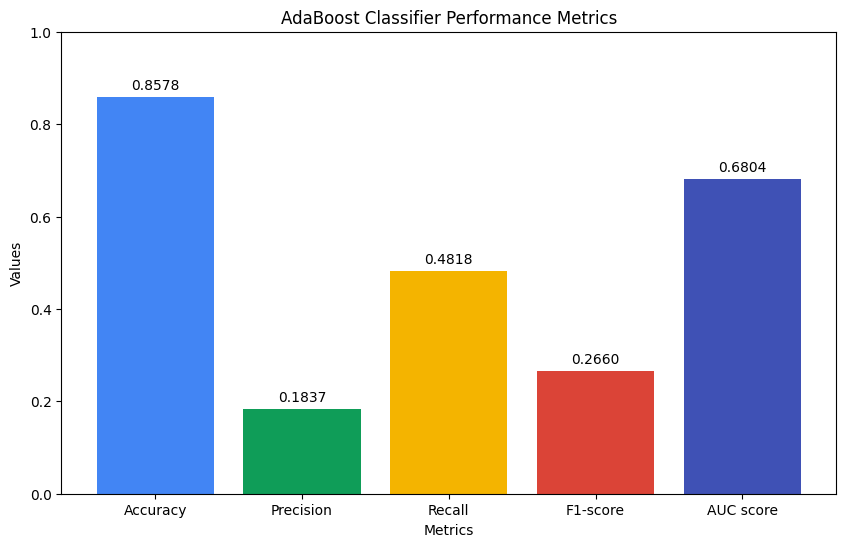

In [ ]:
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
values = [0.8578, 0.1837, 0.4818, 0.2660, 0.6804]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#4285f4', '#0f9d58', '#f4b400', '#db4437', '#3f51b5'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('AdaBoost Classifier Performance Metrics')

# Add the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.0)
plt.show()

# MLP

MLP Neural Network Classifier Results:
Accuracy: 0.8232293466111168
Precision: 0.16794394569739435
Recall: 0.5828267477203647
F1-score: 0.26075131735509094
AUC score: 0.7098210349513725


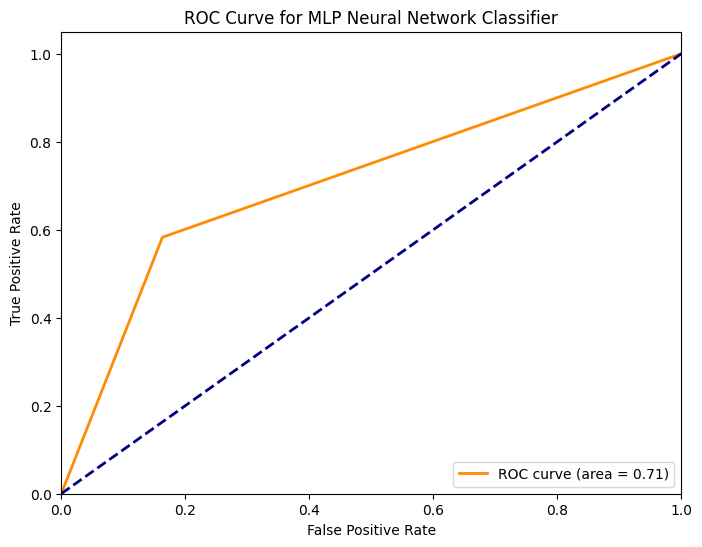

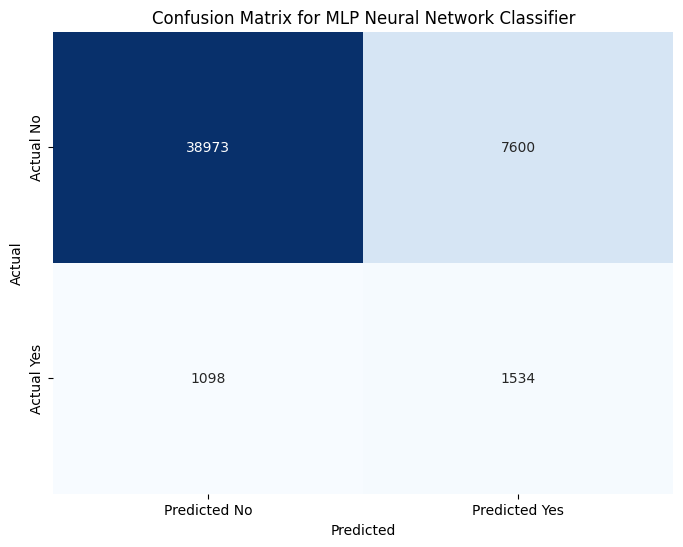

In [ ]:
 from sklearn.neural_network import MLPClassifier
#takes23minutes
# Create an MLP Neural Network classifier
mlp_classifier = MLPClassifier(random_state=42)

# Fit the classifier to the training set
mlp_classifier.fit(X_train_sm, y_train_sm)

# Make predictions on the testing set
y_pred_mlp = mlp_classifier.predict(X_test)

# Calculate metrics for the MLP Neural Network model
acc_mlp = accuracy_score(y_test, y_pred_mlp)
prec_mlp = precision_score(y_test, y_pred_mlp)
rec_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Calculate ROC curve for the MLP Neural Network model
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp)

# Print the metrics for the MLP Neural Network classifier
print("MLP Neural Network Classifier Results:")
print("Accuracy:", acc_mlp)
print("Precision:", prec_mlp)
print("Recall:", rec_mlp)
print("F1-score:", f1_mlp)
print("AUC score:", auc_mlp)

# Plot the ROC curve for the MLP Neural Network model
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_mlp))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Neural Network Classifier')
plt.legend(loc='lower right')
plt.show()

# Plot the confusion matrix for the MLP Neural Network Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Neural Network Classifier')
plt.show()



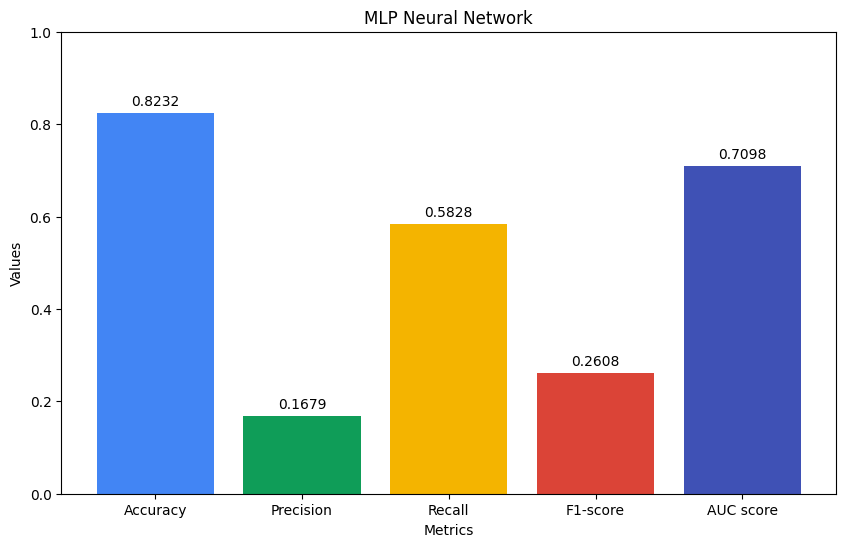

In [ ]:
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score']
values = [0.8232, 0.1679, 0.5828, 0.2608, 0.7098]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#4285f4', '#0f9d58', '#f4b400', '#db4437', '#3f51b5'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Neural Network')

# Add the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.0)
plt.show()